# Gesture model training

## Data Reading

This section reads the data from the sensors. The data is stored in two .csv files, Measurement.cs and Batch.csv <br>
Measurement.csv contains the actual values of rotation and acceleration. Each gesture has 100 tim

In [1]:
import pandas as pd

ms = pd.read_csv("measurements_utcn_users.csv")
ms

,id,batchId,xRotation,yRotation,zRotation,xAcceleration,yAcceleration,zAcceleration
0,1,2,0.005060,0.003861,0.005326,0.908973,2.029113,9.494870
1,2,2,0.005060,0.003861,0.005326,0.882652,2.127369,9.384650
2,3,2,0.005060,0.003861,0.005326,0.861117,2.098655,9.432507
3,4,2,0.005060,0.003861,0.005326,0.868295,1.971686,9.458828
4,5,2,0.005060,0.003861,0.005326,0.849153,2.036292,9.463613
...,...,...,...,...,...,...,...,...
245095,245096,2452,0.525959,-0.900521,-2.217150,-1.364358,4.855935,8.718698
245096,245097,2452,0.525959,-0.900521,-2.217150,-1.450499,3.099902,9.257681
245097,245098,2452,0.525959,-0.900521,-2.217150,-1.469642,2.980261,9.217003
245098,245099,2452,0.525959,-0.900521,-2.217150,-0.887588,3.332305,8.704341


The Batch.csv contains the id of the batch and the type of the gesture: <br> 
0 -> Up and down <br>
1 -> Left and right <br>
2 -> Rotation <br>
3 -> Other

In [2]:
bt = pd.read_csv("measurement_batch_utcn_users.csv")
bt

,id,type,userName
0,1,1,Default
1,2,0,Default
2,3,0,Default
3,4,0,Default
4,5,1,Default
...,...,...,...
2447,2448,3,Victor
2448,2449,3,Victor
2449,2450,3,Victor
2450,2451,3,Victor


## Data preparing

This section prepares the data in order to feed it to the neural network model. <br>
Firstly, we concatenate all the values from the table, and we will organise the data in two columns with gesture's type and it's 100 measures.

In [3]:
import numpy as np
data = pd.DataFrame(columns=['type', 'sensors'])
for i in set(ms['batchId'].tolist()):
    allMeasurements = ms.loc[ms['batchId'] == i]
    filtered = allMeasurements.drop('id', inplace=False, axis=1).drop('batchId', inplace=False, axis=1).to_numpy()
    flat = filtered.flatten()
    batchType = bt.loc[bt['id'] == i].iat[0,1]
    data.loc[len(data)] = {
    "type": batchType,
    "sensors": filtered
    }
data

,type,sensors
0,0,"[[0.005059857, 0.0038614697, 0.005326165, 0.90..."
1,0,"[[0.007856093, 0.0022636203, -0.0015978495, 0...."
2,0,"[[0.010918639, 0.0029293909, -0.004260932, 0.2..."
3,1,"[[-0.0034620073, 0.0061250897, 0.005326165, 0...."
4,3,"[[-0.007323477, 0.00013315413, -0.0037283157, ..."
...,...,...
2446,3,"[[0.09946613, 0.041810397, -0.08375394, -0.164..."
2447,3,"[[0.028761292, 0.039280467, -0.011983871, -1.1..."
2448,3,"[[0.11424624, 0.04713656, -0.023701435, -2.672..."
2449,3,"[[-0.0075897854, 0.021837277, 0.0027962367, -0..."


Now, we split the data into training and test.

In [4]:
from sklearn.model_selection import train_test_split

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = np.stack(data['sensors'].values)
y = data['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_test)
print(y_test)

[[[-1.1051793e-01 -8.0198730e-01 -8.2555560e-03  1.9037895e-01
    1.0900803e+00  1.1995668e+01]
  [-1.1051793e-01 -8.0198730e-01 -8.2555560e-03 -2.5513470e-01
    1.4949160e+00  1.2242429e+01]
  [-1.1051793e-01 -8.0198730e-01 -8.2555560e-03 -3.6535412e-01
    4.3130627e-01  1.2649657e+01]
  ...
  [ 4.2968836e-01  1.2581733e+00 -5.3261653e-02  3.4695927e-02
    3.8584266e-02  1.0718948e+01]
  [ 4.2968836e-01  1.2581733e+00 -5.3261653e-02 -8.5094760e-02
   -3.3349965e-02  1.0874631e+01]
  [ 4.2968836e-01  1.2581733e+00 -5.3261653e-02 -1.6899310e-01
   -3.0164522e-01  1.0982458e+01]]

 [[ 9.7202510e-03 -1.4913263e-02 -3.7283156e-02 -1.3055839e-01
    1.0446166e+00  1.1416007e+01]
  [ 9.7202510e-03 -1.4913263e-02 -3.7283156e-02 -3.5578280e-01
    6.1585270e-01  1.1861521e+01]
  [-2.9320538e-01 -8.5777890e-01  8.4952330e-02 -2.5752753e-01
   -3.8075790e-01  1.2132209e+01]
  ...
  [ 1.0106398e-01  2.3934455e+00 -3.6790484e-01  1.4252250e-01
   -6.6341007e-01  1.0119995e+01]
  [ 1.0106398e-0

## Model training

This section covers the model training process.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.layers import LSTM

import tensorflow as tf

model = Sequential()
model.add(Input(shape=(100, 6)))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(16))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='softmax')) 

model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

history = model.fit(X_train, y_train, epochs=10, batch_size=40, validation_split=0.1)

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.4323 - loss: 1.3296 - val_accuracy: 0.6327 - val_loss: 0.9186
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6610 - loss: 0.8205 - val_accuracy: 0.8571 - val_loss: 0.5842
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8898 - loss: 0.5241 - val_accuracy: 0.8724 - val_loss: 0.4588
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8909 - loss: 0.4009 - val_accuracy: 0.8878 - val_loss: 0.3548
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9242 - loss: 0.2838 - val_accuracy: 0.8980 - val_loss: 0.3209
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9273 - loss: 0.2559 - val_accuracy: 0.9337 - val_loss: 0.2147
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9563 - loss: 0.1943 - val_accuracy: 0.9235 - val_loss: 0.2274
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9544 - loss: 0.1738 - val_accuracy: 0.9337 - v

In [20]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 100, 32)        │         4,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,406 (99.25 KB)

 Trainable params: 8,468 (33.08 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16,938 (66.17 KB)

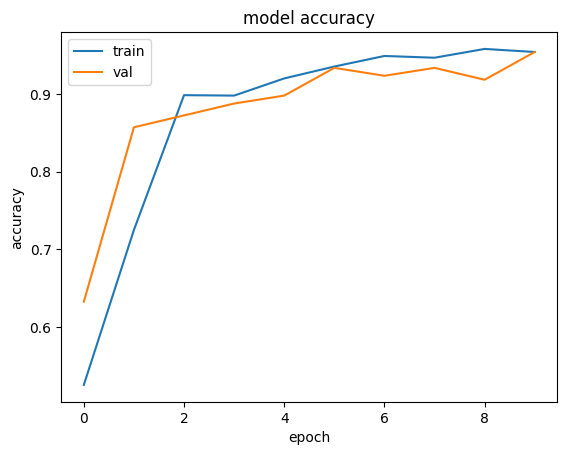

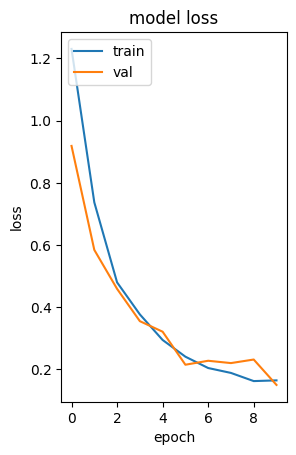

In [21]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.subplot(1,2,1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [24]:
loss, accuracy = model.evaluate(X_test, y_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9576 - loss: 0.1568 


Training two predefined trees classifiers with the recorded data.

In [25]:
from sklearn.ensemble import RandomForestClassifier
X = np.array(data['sensors'].tolist())
y = np.array(data['type'])

X = X.reshape(X.shape[0], -1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X_train, y_train)

accuracy = rfc.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.9714867617107943


In [26]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics 

clf = DecisionTreeClassifier()

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9083503054989817


## Model exporting

This section is used to convert the keras model to a tensor flow lite model in order to be imported into the watch application.

In [27]:
import tensorflow as tf

# Save the model
model.save('temp_model.h5')

# Reload the model
temp = tf.keras.models.load_model('temp_model.h5', compile=False)

#converter = tf.lite.TFLiteConverter.from_keras_model(temp)
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('model_100_6_utcn_users.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /var/folders/n4/l9jzx91j5bj33w5yq7mv1mqw0000gn/T/tmpd25_bo_z/assets


INFO:tensorflow:Assets written to: /var/folders/n4/l9jzx91j5bj33w5yq7mv1mqw0000gn/T/tmpd25_bo_z/assets


Saved artifact at '/var/folders/n4/l9jzx91j5bj33w5yq7mv1mqw0000gn/T/tmpd25_bo_z'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 100, 6), dtype=tf.float32, name='keras_tensor_33')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  13327265680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13327256464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13327258960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13327269328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13327253968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13327269520: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1743605499.222172 1063226 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1743605499.222217 1063226 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-04-02 17:51:39.222531: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/n4/l9jzx91j5bj33w5yq7mv1mqw0000gn/T/tmpd25_bo_z
2025-04-02 17:51:39.222834: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-04-02 17:51:39.222843: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /var/folders/n4/l9jzx91j5bj33w5yq7mv1mqw0000gn/T/tmpd25_bo_z
I0000 00:00:1743605499.225019 1063226 mlir_graph_optimization_pass.cc:401] MLIR V1 optimization pass is not enabled
2025-04-02 17:51:39.225417: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-04-02 17:51:39.240551: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /var/folder

In [29]:
import tensorflow as tf

interpreter = tf.lite.Interpreter(model_path="model_100_6_utcn_users.tflite")
interpreter.allocate_tensors()

inputs = interpreter.get_input_details()
print('{} input(s):'.format(len(inputs)))
for i in range(0, len(inputs)):
    print('{} {}'.format(inputs[i]['shape'], inputs[i]['dtype']))

outputs = interpreter.get_output_details()
print('\n{} output(s):'.format(len(outputs)))
for i in range(0, len(outputs)):
    print('{} {}'.format(outputs[i]['shape'], outputs[i]['dtype']))

1 input(s):
[  1 100   6] <class 'numpy.float32'>

1 output(s):
[1 4] <class 'numpy.float32'>


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
